## Importing the necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## Importing the dataset

In [2]:
data = pd.read_csv("creditcard.csv")

## Basic EDA

In [3]:
print(data.columns)

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount', u'Class'],
      dtype='object')


In [4]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

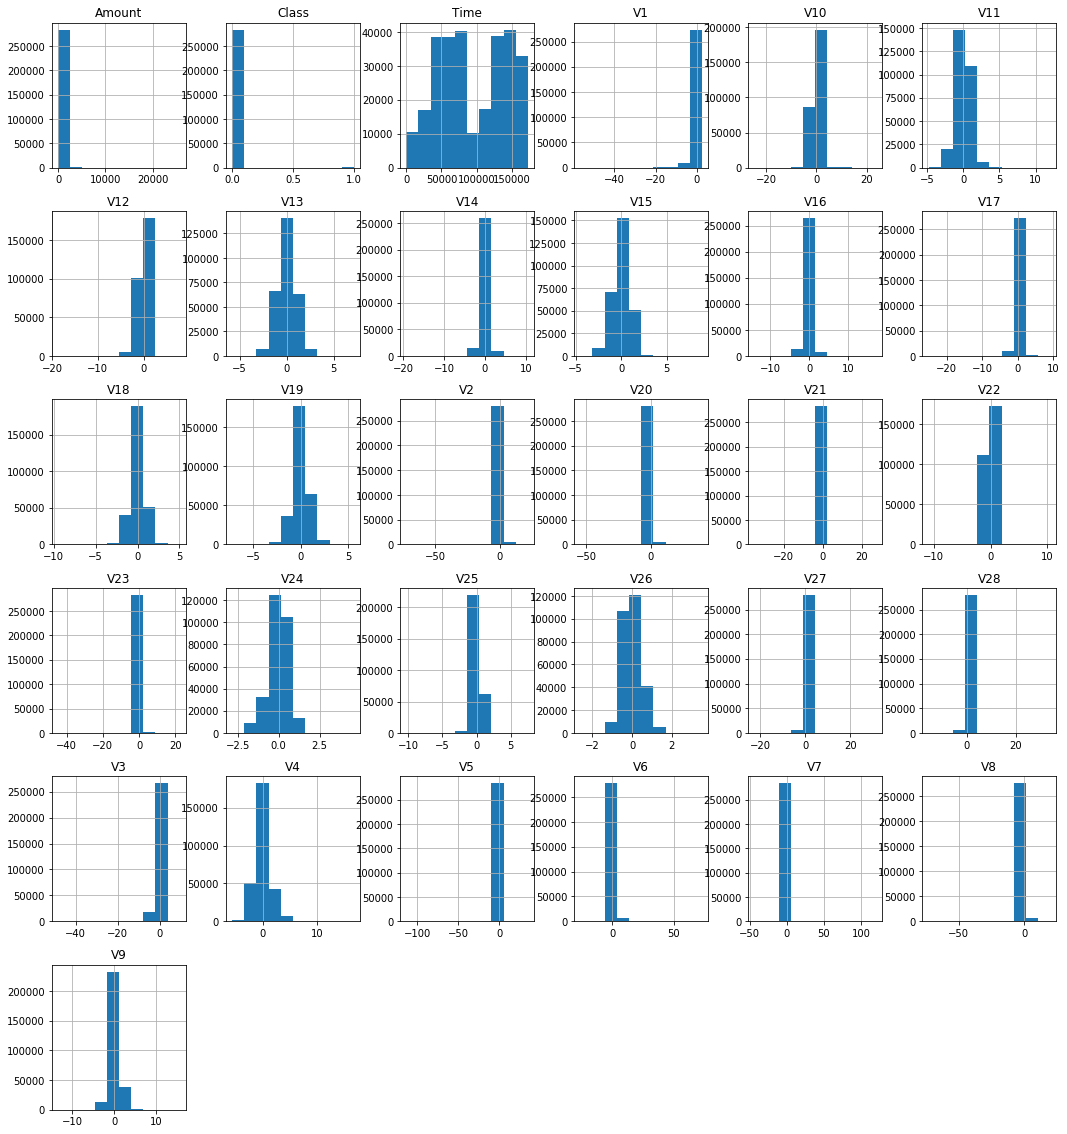

In [7]:
data.hist(figsize=(18,20))
plt.show()

In [9]:
# Finding the fraction of outliers in the dataset
fraud = data[data["Class"] == 1]
valid = data[data["Class"] == 0]

outlier_fraction = len(fraud)/float(len(valid))

print(outlier_fraction)

print("Fraud Cases: {}".format(len(fraud)))
print("Valid Cases: {}".format(len(valid)))

0.00173047500132
Fraud Cases: 492
Valid Cases: 284315


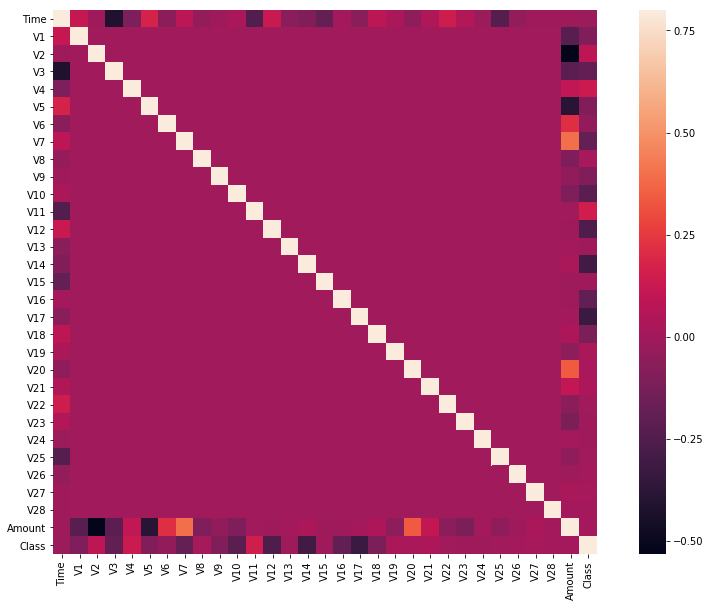

In [10]:
# Plotting the correlation matrix of data
corr_mat = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, vmax=0.8, square=True)
plt.show()

In [13]:
# Splitting the dataset into features and predictors
cols_list = data.columns.tolist()
cols_list = [c for c in cols_list if c not in ["Class"]]
target = "Class"

X = data[cols_list]
Y = data[target]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Unsupervised outlier detection
Methods used:
<ul>
    <li>Local Outlier Factor</li>
    <li>Isolation Forest</li>
</ul>

In [15]:
seed = 1

classifiers = {
    "Iso_For" : IsolationForest(max_samples="auto",
                               contamination=outlier_fraction,
                               random_state = 1),
    "Loc_Out" : LocalOutlierFactor(n_neighbors=10, 
                                   contamination=outlier_fraction)
}

In [16]:
# Fit, predict and evaluate both models
for name, model in classifiers.items():
    if name == "Loc_Out":
        y_pred = model.fit_predict(X)
        scores_pred = model.negative_outlier_factor_
    else:
        model.fit(X)
        scores_pred = model.decision_function(X)
        y_pred = model.predict(X)
    # Changing the label values of y_pred to "0" for valid and "1" for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    print("{0} : {1}".format(name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Iso_For : 699
0.9975457063906434
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.29      0.29       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807

Loc_Out : 889
0.9968785879560544
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.10      0.10      0.10       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.55      0.55      0.55    284807
weighted avg       1.00      1.00      1.00    284807

